In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
from matplotlib import pyplot as plt

In [2]:
work_data = pd.read_csv("works.csv", header=0, index_col=False)

<h1>Образование менеджеров</h1>

In [ ]:
law = r'(.*юри.*)|(.*адвокат.*)'
finance = r'(.*эконом.*)|(.*банк.*)|(.*финанс.*)|(.*бухгалтер.*)'
administrative = r'(.*менедж.*)|(.*директ.*)|(.*секретар.*)|(.*управ.*)'
tech = r'(.*техн.*)|(.*инженер.*)|(.*разработ.*)|(.*меха.*)|(.*матем.*)'
trade = r'(.*прода.*)|(.*касси.*)|(.*маркето.*)'
stud = r'(.*педагог.*)|(.*преподават.*)|(.*учител.*)|(.*воспита.*)'

In [4]:
# выбор менеджеров с известной квалификацией
managers = work_data[work_data.jobTitle.str.contains(r'.*менеджер.*', case=False, flags=re.IGNORECASE, na=False)]
managers = managers[~managers.qualification.isna()]
total_managers = managers.shape[0]

In [5]:
def get_managers_qualif(qualif_regex):
    return managers[managers.qualification.str.contains(qualif_regex, case=False, flags=re.IGNORECASE, na=False)]

In [ ]:
law_m = get_managers_qualif(law) # менеджеры с образованием в сфере юриспруденции: адвокаты, юристы
finance_m = get_managers_qualif(finance) # в сфере финансов: экономисты, бухгалтера, банковское дело
admin_m = get_managers_qualif(administrative) # управленческая сфера
trade_m = get_managers_qualif(trade) # сфера торговли
tech_m = get_managers_qualif(tech) # техническая сфера, инженеры
teach_m = get_managers_qualif(stud) # сфера педагогики

In [7]:
count_by_name = dict()
count_by_name['Юриспруденция'] = law_m.shape[0]
count_by_name['Экономика'] = finance_m.shape[0]
count_by_name['Управление'] = admin_m.shape[0]
count_by_name['Торговля'] = trade_m.shape[0]
count_by_name['Инженеры и технологи'] = tech_m.shape[0]
count_by_name['Педагоги'] = teach_m.shape[0]

In [9]:
# https://stackoverflow.com/questions/44706485/how-to-remove-rows-in-a-pandas-dataframe-if-the-same-row-exists-in-another-dataf
other_m = managers.copy()
for df in [law_m, finance_m, admin_m, trade_m, tech_m, teach_m]:
    other_m = pd.merge(other_m, df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
# расплывчатые описания профессий - просто "бакалавр" не несет никакой информации
vague_qualif_count = other_m[~other_m.qualification.str.contains('( *бакалавр *)|( *специалист *)|( *магистр *)', case=False, flags=re.IGNORECASE)].shape[0]
# остальные профессий, количестов которых по отдельности слишком мало, чтобы выделить их в одну группу
# поэтому они рассматриваются вместе
misc_qs_count = other_m.shape[0] - vague_qualif_count
count_by_name[r'Бакалавр/Специалист/Магистр'] = vague_qualif_count
count_by_name['Другое'] = misc_qs_count

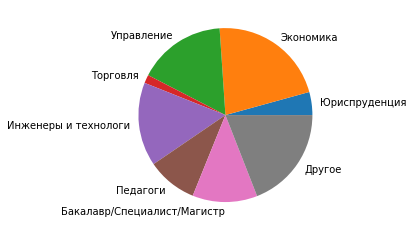

In [11]:
plt.pie(list(count_by_name.values()), labels=list(count_by_name.keys()))
plt.show()